In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# df = pd.read_csv("https://raw.githubusercontent.com/levvers/dsemr/master/data/week2/cet.csv")
df = pd.read_csv("../../data/week2/cet.csv")

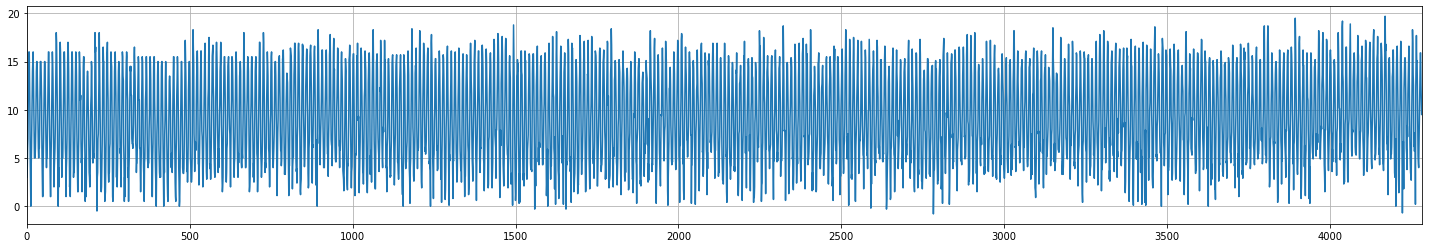

In [2]:
temperature = df.set_index('Year').unstack()
date_ = [datetime.strptime(f'{i[0]}-{i[1]}', '%b-%Y') for i in temperature.index]
dfx = pd.DataFrame({
    'year': [(i.year + i.month/12) for i in date_],
    'temp': temperature
}).sort_values('year').reset_index(drop=True)

dfx['temp'].plot(figsize=(25,4), grid=True);

## Quantile Regression

In [3]:
import statsmodels.formula.api as smf
mod = smf.quantreg('temp ~ year', dfx)
res = mod.fit(q=.9)

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                   temp   Pseudo R-squared:            0.0003544
Model:                       QuantReg   Bandwidth:                       1.176
Method:                 Least Squares   Sparsity:                        13.20
Date:                Tue, 04 Feb 2020   No. Observations:                 4284
Time:                        20:25:44   Df Residuals:                     4282
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2899      1.101     12.980      0.000      12.131      16.448
year           0.0007      0.001      1.198      0.231      -0.000       0.002
==============================================================================

The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
print(f'RESULT: 90% quantile temperature raises by {res.params[1]:.4f} ± 0.001 °C every year')

RESULT: 90% quantile temperature raises by 0.0007 ± 0.001 °C every year


In [64]:
from scipy.stats import linregress
    
dfx = df.set_index('Year').unstack().reset_index()
dfx.columns = ['month', 'year', 'temp']
month_names = ['JAN','FEB','MAR','APR','MAY', 'JUN', 'JUL','AUG','SEP', 'OCT', 'NOV','DEC']
dfx['month'] = [month_names.index(i)+1 for i in dfx['month']]


coeffs = {}
for month, sub_df in dfx.groupby('month'):
    x=sub_df['year']
    y=sub_df['temp']
    r = linregress(x,y)
    coeffs[month] = r[:2]

df_coeff = pd.DataFrame(coeffs, index=['slope', 'intercept']).T
df_coeff.style.background_gradient(cmap='Blues')

,slope,intercept
1,0.00422128,-4.343
2,0.00308877,-1.74913
3,0.00415843,-2.30626
4,-8.48723e-05,7.50409
5,0.0013737,8.695
6,8.147e-05,14.1736
7,0.00139834,13.4024
8,0.00138539,13.0901
9,0.00201183,9.64209
10,0.0037851,2.7619
